# Stock market prediction using stacked LSTM
Using keras and tensorflow

<b>Steps:</b>
<ol>
    <li>Collect stock data- AAPL-apple stock price from 2015 to today</li>
    <li>Preprocess the data - train and test</li>
    <li>Create a stacked LSTM model</li>
    <li>Predict test data and plot the o/p</li>
    <li>Predict the future for 30 days and plot the o/p</li>
</ol>
    

In [64]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt

In [65]:
key = '5dcd9151e6bc3942878f97abaf95cffd0579d61b'

df = pdr.get_data_tiingo('TSLA', api_key = key)

In [66]:
df.to_csv("datasets/TSLA.csv")

In [67]:
df = pd.read_csv('datasets/AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-07-11 00:00:00+00:00,224.78,226.7800,219.51,219.96,5429823,44.956,45.35600,43.902,43.992,27149115,0.0,1.0
1,TSLA,2016-07-12 00:00:00+00:00,224.65,227.5000,223.22,224.10,4576165,44.930,45.50000,44.644,44.820,22880825,0.0,1.0
2,TSLA,2016-07-13 00:00:00+00:00,222.53,225.5900,220.29,225.50,3567062,44.506,45.11800,44.058,45.100,17835310,0.0,1.0
3,TSLA,2016-07-14 00:00:00+00:00,221.53,224.9400,221.05,223.12,2675834,44.306,44.98800,44.210,44.624,13379170,0.0,1.0
4,TSLA,2016-07-15 00:00:00+00:00,220.40,222.7499,219.64,222.52,2234247,44.080,44.54998,43.928,44.504,11171235,0.0,1.0


In [68]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TSLA,2021-06-30 00:00:00+00:00,679.70,692.81,678.1400,679.7700,18924862,679.70,692.81,678.1400,679.7700,18924862,0.0,1.0
1253,TSLA,2021-07-01 00:00:00+00:00,677.92,687.99,672.8000,683.9200,18634522,677.92,687.99,672.8000,683.9200,18634522,0.0,1.0
1254,TSLA,2021-07-02 00:00:00+00:00,678.90,700.00,673.2600,678.9800,27097374,678.90,700.00,673.2600,678.9800,27097374,0.0,1.0
1255,TSLA,2021-07-06 00:00:00+00:00,659.58,684.00,651.4002,681.7115,23284450,659.58,684.00,651.4002,681.7115,23284450,0.0,1.0
1256,TSLA,2021-07-07 00:00:00+00:00,644.65,665.70,638.3200,664.2700,18791960,644.65,665.70,638.3200,664.2700,18791960,0.0,1.0


In [69]:
df1 = df['close']
df1

0       224.78
1       224.65
2       222.53
3       221.53
4       220.40
         ...  
1252    679.70
1253    677.92
1254    678.90
1255    659.58
1256    644.65
Name: close, Length: 1257, dtype: float64

In [70]:
df1.shape

(1257,)

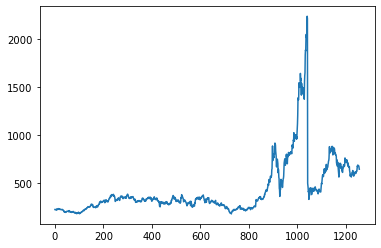

In [71]:
import matplotlib.pyplot as plt

plt.plot(df1)

In [72]:
for i in range(df.shape[0]):
    df.at[i,'new_date'] = df.at[i,'date'].split()[0]

In [73]:
type(df['new_date'])

pandas.core.series.Series

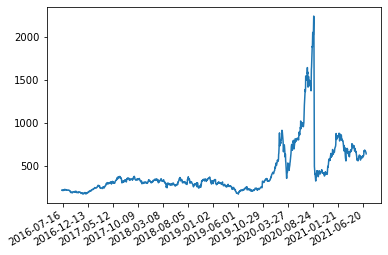

In [74]:
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['new_date']]
y = df['close']

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=150))
plt.plot(x,y)
plt.gcf().autofmt_xdate()


## LSTM is sensitive to the scale of data, we use Scaler for that

In [75]:
df1

0       224.78
1       224.65
2       222.53
3       221.53
4       220.40
         ...  
1252    679.70
1253    677.92
1254    678.90
1255    659.58
1256    644.65
Name: close, Length: 1257, dtype: float64

In [76]:
from scipy.stats import shapiro

stat,p =shapiro(df1)
print("stat: ",stat,":","p :",p)
if p>0.05:
    print("gaussian distribution - fail to reject H0")
else:
    print("not gaussian distribution - reject H0")

stat:  0.6899072527885437 : p : 4.624284932271896e-43
not gaussian distribution - reject H0


In [77]:
# as not gaussian, we go for MinMaxScaler

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np


# scaler = MinMaxScaler()
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[-0.70673315],
       [-0.70717937],
       [-0.71445608],
       ...,
       [ 0.85199306],
       [ 0.78567889],
       [ 0.734433  ]])

In [78]:
df1.shape

(1257, 1)

In [79]:
df1

array([[-0.70673315],
       [-0.70717937],
       [-0.71445608],
       ...,
       [ 0.85199306],
       [ 0.78567889],
       [ 0.734433  ]])

In [80]:
# we do train test split  as per time series, we dont use train_test_split
# divide data sequentially

train_size = int(len(df1)*0.80)
test_size = int(len(df1) - train_size)

train_data = df1[0:train_size,:]
test_data = df1[train_size:,:]
#test_data = df1[train_size:len(df1),:1]

In [81]:
train_size, test_size

(1005, 252)

In [82]:
train_data.shape, test_data.shape

((1005, 1), (252, 1))

In [83]:
test_data

array([[ 3.20999036e+00],
       [ 3.30747082e+00],
       [ 3.82360237e+00],
       [ 3.66025396e+00],
       [ 3.72800974e+00],
       [ 3.82827045e+00],
       [ 3.67254199e+00],
       [ 3.67322847e+00],
       [ 4.16117993e+00],
       [ 3.90498482e+00],
       [ 3.98725970e+00],
       [ 3.71520685e+00],
       [ 3.38545518e+00],
       [ 3.80626870e+00],
       [ 3.58964928e+00],
       [ 3.66729040e+00],
       [ 3.62740579e+00],
       [ 3.43268515e+00],
       [ 3.61885909e+00],
       [ 3.62572391e+00],
       [ 3.61892774e+00],
       [ 3.63457953e+00],
       [ 3.50802656e+00],
       [ 3.39084407e+00],
       [ 3.23920017e+00],
       [ 3.85830404e+00],
       [ 4.08566690e+00],
       [ 4.18764382e+00],
       [ 4.82239947e+00],
       [ 4.99899699e+00],
       [ 4.96961556e+00],
       [ 5.39283176e+00],
       [ 5.55810232e+00],
       [ 5.43529068e+00],
       [ 5.46666291e+00],
       [ 5.91229275e+00],
       [ 6.20603843e+00],
       [ 6.11902683e+00],
       [ 2.3

In [84]:
len(train_data)

1005

In [85]:
# create datasets

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [86]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [87]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(904, 100) (904,)
(151, 100) (151,)


In [89]:
len(train_data) - time_step -1

904

In [94]:
X_train, y_train

(array([[[-0.70673315],
         [-0.70717937],
         [-0.71445608],
         ...,
         [-0.80328686],
         [-0.80510603],
         [-0.82758832]],
 
        [[-0.70717937],
         [-0.71445608],
         [-0.71788849],
         ...,
         [-0.80510603],
         [-0.82758832],
         [-0.82817183]],
 
        [[-0.71445608],
         [-0.71788849],
         [-0.72176711],
         ...,
         [-0.82758832],
         [-0.82817183],
         [-0.85398356]],
 
        ...,
 
        [[ 1.08941289],
         [ 1.16907913],
         [ 1.17971961],
         ...,
         [ 1.8159512 ],
         [ 1.98623308],
         [ 2.22808072]],
 
        [[ 1.16907913],
         [ 1.17971961],
         [ 1.15538382],
         ...,
         [ 1.98623308],
         [ 2.22808072],
         [ 2.3647593 ]],
 
        [[ 1.17971961],
         [ 1.15538382],
         [ 1.2813876 ],
         ...,
         [ 2.22808072],
         [ 2.3647593 ],
         [ 2.6703468 ]]]),
 array([-8.28171832

In [91]:
# reshape input into [samples,time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [93]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(904, 100, 1) (904,)
(151, 100, 1) (151,)


In [95]:
### Create LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [96]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 10s 660ms/step - loss: 0.1582 - val_loss: 0.1302
Epoch 2/100
15/15 [==============================] - 5s 326ms/step - loss: 0.0441 - val_loss: 0.1197
Epoch 3/100
15/15 [==============================] - 5s 303ms/step - loss: 0.0307 - val_loss: 0.0835
Epoch 4/100
15/15 [==============================] - 4s 251ms/step - loss: 0.0272 - val_loss: 0.0811
Epoch 5/100
15/15 [==============================] - 4s 243ms/step - loss: 0.0240 - val_loss: 0.0401
Epoch 6/100
15/15 [==============================] - 4s 241ms/step - loss: 0.0188 - val_loss: 0.0245
Epoch 7/100
15/15 [==============================] - 4s 241ms/step - loss: 0.0177 - val_loss: 0.0724
Epoch 8/100
15/15 [==============================] - 4s 240ms/step - loss: 0.0244 - val_loss: 0.0270
Epoch 9/100
15/15 [==============================] - 4s 242ms/step - loss: 0.0167 - val_loss: 0.0265
Epoch 10/100
15/15 [==============================] - 4s 245ms/step - loss: 0.0184 - val_l

15/15 [==============================] - 4s 287ms/step - loss: 0.0068 - val_loss: 0.0525
Epoch 82/100
15/15 [==============================] - 5s 314ms/step - loss: 0.0065 - val_loss: 0.0602
Epoch 83/100
15/15 [==============================] - 4s 276ms/step - loss: 0.0059 - val_loss: 0.0818
Epoch 84/100
15/15 [==============================] - 4s 275ms/step - loss: 0.0058 - val_loss: 0.0813
Epoch 85/100
15/15 [==============================] - 4s 276ms/step - loss: 0.0064 - val_loss: 0.0509
Epoch 86/100
15/15 [==============================] - 4s 280ms/step - loss: 0.0068 - val_loss: 0.1224
Epoch 87/100
15/15 [==============================] - 4s 269ms/step - loss: 0.0056 - val_loss: 0.0743
Epoch 88/100
15/15 [==============================] - 4s 277ms/step - loss: 0.0051 - val_loss: 0.0862
Epoch 89/100
15/15 [==============================] - 4s 266ms/step - loss: 0.0049 - val_loss: 0.0651
Epoch 90/100
15/15 [==============================] - 4s 269ms/step - loss: 0.0090 - val_loss: 

In [98]:
import tensorflow as tf

tf.__version__

'2.3.0'

In [99]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [100]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [102]:
# RMSE 

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

401.73767954977313

In [103]:
math.sqrt(mean_squared_error(y_test,test_predict))

780.167351667841

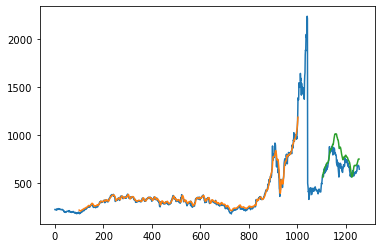

In [104]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## predicting future 30 days

In [110]:
len(test_data) - 100

152

In [111]:
x_input = test_data[152:].reshape(1,-1)
x_input.shape

(1, 100)

In [112]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [113]:
temp_input

[1.322988416774971,
 1.2546834497109922,
 1.2613080017930764,
 1.2243409417288025,
 1.203471886465034,
 0.9741868713959998,
 0.9204353244501754,
 1.0686468057477936,
 0.8633886635153347,
 0.8403228655922222,
 0.9876762442885342,
 0.8778734354253847,
 0.7637801135557034,
 0.6547667590857553,
 0.5741394386670186,
 0.4541766950044023,
 0.8337326376141903,
 0.8147857321773475,
 0.9230439563581464,
 0.9028957072794752,
 0.9516702591377235,
 0.8450595919514328,
 0.9306295833536935,
 0.7636428171394941,
 0.7695122389324291,
 0.8214446083634843,
 0.7945345107865197,
 0.6850749429638924,
 0.7198109362647701,
 0.6453962786794909,
 0.6199277934727206,
 0.7034383386318466,
 0.8143395188246683,
 0.7931272225203776,
 0.8936968473934719,
 0.8956533213244503,
 0.8247740464565527,
 0.8688118719555901,
 0.8455401294081643,
 0.931213093122582,
 1.1383247369738627,
 1.0350435078806404,
 1.0577660647632303,
 1.0609582064400893,
 0.974633084748679,
 0.9895983941154604,
 1.0758548675987663,
 0.99200108139911

In [114]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0536228]
101
1 day input [1.25468345 1.261308   1.22434094 1.20347189 0.97418687 0.92043532
 1.06864681 0.86338866 0.84032287 0.98767624 0.87787344 0.76378011
 0.65476676 0.57413944 0.4541767  0.83373264 0.81478573 0.92304396
 0.90289571 0.95167026 0.84505959 0.93062958 0.76364282 0.76951224
 0.82144461 0.79453451 0.68507494 0.71981094 0.64539628 0.61992779
 0.70343834 0.81433952 0.79312722 0.89369685 0.89565332 0.82477405
 0.86881187 0.84554013 0.93121309 1.13832474 1.03504351 1.05776606
 1.06095821 0.97463308 0.98959839 1.07585487 0.99200108 1.02532979
 1.055535   0.94068655 0.90519542 0.84547148 0.95681887 0.87258752
 0.83380129 0.82467107 0.79927124 0.82957942 0.68085308 0.64021334
 0.54647421 0.48400434 0.54595935 0.50164693 0.50521664 0.4557556
 0.53579941 0.51554819 0.6032806  0.59727388 0.64683789 0.68706574
 0.66774127 0.66321049 0.59874982 0.48795161 0.57791509 0.59878415
 0.59349823 0.57698834 0.61591187 0.61512242 0.64189522 0.57897914
 0.59789172 0.63815389 0.66118537 0

8 day output [[1.3748865]]
9 day input [0.84032287 0.98767624 0.87787344 0.76378011 0.65476676 0.57413944
 0.4541767  0.83373264 0.81478573 0.92304396 0.90289571 0.95167026
 0.84505959 0.93062958 0.76364282 0.76951224 0.82144461 0.79453451
 0.68507494 0.71981094 0.64539628 0.61992779 0.70343834 0.81433952
 0.79312722 0.89369685 0.89565332 0.82477405 0.86881187 0.84554013
 0.93121309 1.13832474 1.03504351 1.05776606 1.06095821 0.97463308
 0.98959839 1.07585487 0.99200108 1.02532979 1.055535   0.94068655
 0.90519542 0.84547148 0.95681887 0.87258752 0.83380129 0.82467107
 0.79927124 0.82957942 0.68085308 0.64021334 0.54647421 0.48400434
 0.54595935 0.50164693 0.50521664 0.4557556  0.53579941 0.51554819
 0.6032806  0.59727388 0.64683789 0.68706574 0.66774127 0.66321049
 0.59874982 0.48795161 0.57791509 0.59878415 0.59349823 0.57698834
 0.61591187 0.61512242 0.64189522 0.57897914 0.59789172 0.63815389
 0.66118537 0.65267299 0.66255833 0.77534734 0.85515088 0.82786322
 0.88569933 0.85837734 

16 day output [[1.5578238]]
17 day input [0.81478573 0.92304396 0.90289571 0.95167026 0.84505959 0.93062958
 0.76364282 0.76951224 0.82144461 0.79453451 0.68507494 0.71981094
 0.64539628 0.61992779 0.70343834 0.81433952 0.79312722 0.89369685
 0.89565332 0.82477405 0.86881187 0.84554013 0.93121309 1.13832474
 1.03504351 1.05776606 1.06095821 0.97463308 0.98959839 1.07585487
 0.99200108 1.02532979 1.055535   0.94068655 0.90519542 0.84547148
 0.95681887 0.87258752 0.83380129 0.82467107 0.79927124 0.82957942
 0.68085308 0.64021334 0.54647421 0.48400434 0.54595935 0.50164693
 0.50521664 0.4557556  0.53579941 0.51554819 0.6032806  0.59727388
 0.64683789 0.68706574 0.66774127 0.66321049 0.59874982 0.48795161
 0.57791509 0.59878415 0.59349823 0.57698834 0.61591187 0.61512242
 0.64189522 0.57897914 0.59789172 0.63815389 0.66118537 0.65267299
 0.66255833 0.77534734 0.85515088 0.82786322 0.88569933 0.85837734
 0.85473899 0.8486293  0.85199306 0.78567889 0.734433   1.05362284
 1.09097385 1.1396473

 1.72987854 1.78271246 1.83814907 1.89319181]
24 day output [[1.9475725]]
25 day input [0.82144461 0.79453451 0.68507494 0.71981094 0.64539628 0.61992779
 0.70343834 0.81433952 0.79312722 0.89369685 0.89565332 0.82477405
 0.86881187 0.84554013 0.93121309 1.13832474 1.03504351 1.05776606
 1.06095821 0.97463308 0.98959839 1.07585487 0.99200108 1.02532979
 1.055535   0.94068655 0.90519542 0.84547148 0.95681887 0.87258752
 0.83380129 0.82467107 0.79927124 0.82957942 0.68085308 0.64021334
 0.54647421 0.48400434 0.54595935 0.50164693 0.50521664 0.4557556
 0.53579941 0.51554819 0.6032806  0.59727388 0.64683789 0.68706574
 0.66774127 0.66321049 0.59874982 0.48795161 0.57791509 0.59878415
 0.59349823 0.57698834 0.61591187 0.61512242 0.64189522 0.57897914
 0.59789172 0.63815389 0.66118537 0.65267299 0.66255833 0.77534734
 0.85515088 0.82786322 0.88569933 0.85837734 0.85473899 0.8486293
 0.85199306 0.78567889 0.734433   1.05362284 1.09097385 1.13964736
 1.19014275 1.23781371 1.28065395 1.3174578 

In [115]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [116]:
len(df1)

1257

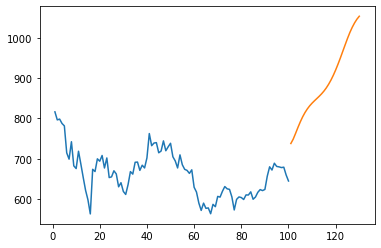

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

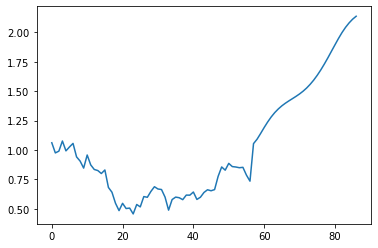

In [118]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])